In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('fivethirtyeight')

In [8]:
recipes = pd.read_csv('epi_r.csv')

In [9]:
df1 = recipes.iloc[:,:10]
df1.drop(['#cakeweek','#wasteless'], axis=1, inplace=True)
df1

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0
...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0


In [10]:
df1.describe()

,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000848,0.001346
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.029105,0.036671
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000


In [11]:
df1.isnull().values.any()

True

In [12]:
calorie = df1.loc[recipes['calories'].notnull()]
q3  = calorie['calories'].quantile(.75)
q1  = calorie['calories'].quantile(.25)
iqr = q3 - q1
for i in df1.columns[1:6]:
    df1[i].fillna(calorie.loc[(calorie['calories'] > q1) & (df1['calories'] < q3)][i].mean(), inplace=True)
df1 = df1.loc[(df1['calories'] > q1-(iqr*3)) & (df1['calories'] < q3+(iqr*3))]

In [14]:
df1.describe()
#after removing null values

,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes
count,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000,19610.000000
mean,3.709651,402.378215,16.820585,22.087230,603.389204,0.000816,0.001377
std,1.343762,282.300829,21.729452,20.273537,2443.852586,0.028553,0.037081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,226.000000,4.000000,10.000000,118.000000,0.000000,0.000000
50%,4.375000,353.444934,13.167150,18.369012,448.000000,0.000000,0.000000
75%,4.375000,481.000000,17.000000,26.000000,528.000000,0.000000,0.000000
max,5.000000,1743.000000,253.000000,166.000000,132220.000000,1.000000,1.000000


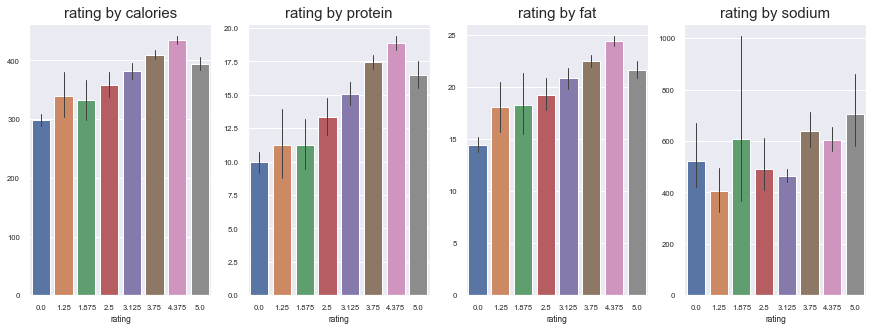

In [16]:
dict_plt = {0:'calories',1:'protein',2:'fat',3:'sodium'}
sns.set(font_scale=.7)
fig, ax = plt.subplots(1,4, figsize=(15,5))
for i in range(4):
    sns.barplot(x='rating',y=dict_plt[i], data=df1, errwidth=1,ax=ax[i] )
    ax[i].set_title('rating by {}'.format(dict_plt[i]), size=15)
    ax[i].set_ylabel('')

In [22]:
five_star = df1.loc[df1['rating'] == 5]

print('We have {:,} 5-star recipes to choose from'.format(len(df1.loc[df1['rating'] == 5])))

We have 2,652 5-star recipes to choose from


In [23]:
a = pd.qcut(five_star['calories'], [0,.33,.66,1], labels=['low cal','med cal', 'high cal']).rename('cal_bin')
five_star = five_star.join(a)

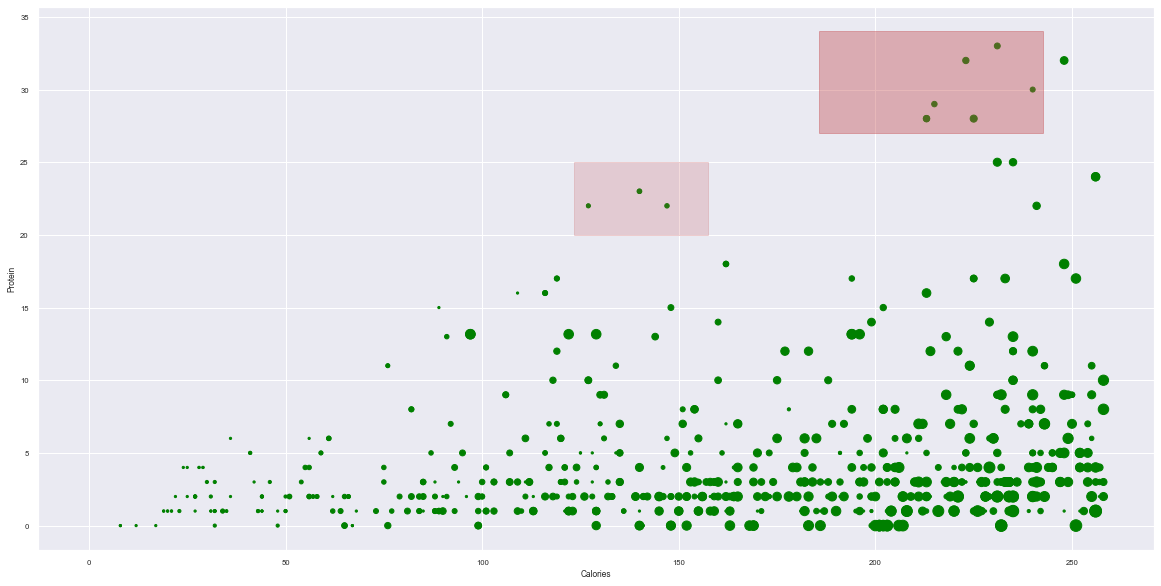

In [24]:
low_cal = five_star.loc[five_star['cal_bin'] == 'low cal']
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.scatter(x='calories', y='protein', s=low_cal['fat']*5, data=low_cal,color = 'green')
plt.axhspan(ymin=20, ymax=25, xmin=.48, xmax=.6, alpha=.2, color='r')
plt.axhspan(ymin=27, ymax=34, xmin=.7, xmax=.9, alpha=.4, color='r')

In [79]:

low_cal.loc[(low_cal['protein'] > 20) & (low_cal['calories'] < 160)]

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,cal_bin
6056,Giblet Stock,5.0,127.0,22.0,3.0,95.0,0.0,0.0,low cal
7850,Turkey Stock,5.0,140.0,23.0,4.0,103.0,0.0,0.0,low cal
13422,Giblet Stock,5.0,127.0,22.0,3.0,95.0,0.0,0.0,low cal
14199,Turkey Stock,5.0,140.0,23.0,4.0,103.0,0.0,0.0,low cal
14518,"Salted Roast Turkey with Orange, Fall Spices, ...",5.0,147.0,22.0,4.0,763.0,0.0,0.0,low cal


In [58]:
#dark red box from chart above
low_cal.loc[low_cal['protein'] > 27]

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,cal_bin
260,My Favorite Roast Turkey,5.0,225.0,28.0,10.0,2397.0,0.0,0.0,low cal
4128,Pan-Cooked Bass with Dill and Cucumber,5.0,248.0,32.0,12.0,409.0,0.0,0.0,low cal
4858,Korean-Style Tuna Tartare,5.0,213.0,28.0,8.0,83.0,0.0,0.0,low cal
9014,Steamed Scrod Fillets Chinese Style,5.0,223.0,32.0,8.0,679.0,0.0,0.0,low cal
10188,Sea Scallops with Spiced Bacon,5.0,215.0,29.0,6.0,970.0,0.0,0.0,low cal
13969,Shrimp Courtbouillon with Rice,5.0,240.0,30.0,5.0,965.0,0.0,0.0,low cal
14865,Korean-Style Tuna Tartare,5.0,213.0,28.0,8.0,83.0,0.0,0.0,low cal
15897,Mahimahi with Brown-Sugar Soy Glaze,5.0,231.0,33.0,7.0,995.0,0.0,0.0,low cal
